# INTRODUCCIÓN A LA PROGRAMACIÓN CON PYTHON I

## Módulo 6 - Aplicaciones

Los fundamentos de las clases pasadas son indispensables para una variedad de análisis más complejo. Hoy cubriremos 4 ejemplos de análisis que se pueden hacer con Python y las bibliotecas que nos ayudan a hacerlo:
- Regresión Lineal Múltiple
- Regresión Logística
- Datos geográficos


### 6.1 Regresión Lineal
"Una regresión lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente Y, las variables independientes Xᵢ y un término aleatorio ε." - Wikipedia

En otras palabras, es un método para encontrar la línea recta que mejor se ajusta a un conjunto de datos. Por ejemplo, si tenemos los datos de la gráfica de abajo, qué línea recta parece que mejor se "ajusta" a los puntos?

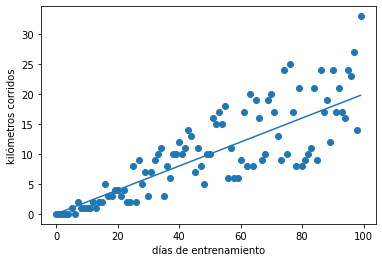

In [383]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

x = range(100)
y = [random.randint(int(i/10), int(i/3)) for i in x]

# graficar el scatter
plt.scatter(x,y)
plt.xlabel("días de entrenamiento")
plt.ylabel("kilómetros corridos")
# graficar la linea recta
plt.plot([i/5 for i in x])
plt.show()

Podríamos decir que esa es un línea que se ajusta bien a nuestros datos. ¿Pero es la que mejor aproxima? 

La respuesta a la recta que mejor ajusta a nuestros datos es la solución a la ecuación:
<center> $ \underset{\beta_0 \beta_1}{\textrm{min}}$ $Y - \beta_0 + \beta_1X + \epsilon = 0$ </center> 

Donde $Y$ es la variable que queremos explciar, también llamada variable dependiente.

Que significa, encontremos la ordenada al origen $\beta_0$ y la pendiente $\beta_1$ de la recta que mejor ajusta los datos.

### Regresión con datos censales
Usemos los siguientes datos del censo 2000 y 2010 y la encuesta intercensal que alguien unificó para nosotros. (Agradecimiento especial a la [Dra. Fernanda Sobrino](https://www.fersobrino.com/) por su generosa donación de esta base)

In [384]:
# docs: https://www.statsmodels.org/stable/regression.html
import statsmodels.api as sm
import pandas as pd

In [385]:
## Recuerda descargar del Drive el archivo .csv y ponerlo en el folder "files"
## leemos el .csv con pandas
path = "files/CensosLimpiosTodo.csv"
df = pd.read_csv(path, header=0, index_col=0) 

Las variables son:

    *year - año
    *CVEGEO - identificador geografico los dos primero digitos es el estado los ultimos 3 el municipio
    *POBTOT - poblacion total
    *SinSS - % de población sin seguro social
    *InMigrants - % de población q no estaba ahi hace 5 años
    *Illiterate - % de analfabetismo
    *GRADOESCO - grado escolar promedio
    *IndigenouL - % de población que habla una lengua indigena (el censo en mexico no pregunta si eres inndigena o no), 
    *PISOSINTIERRA - % de población con piso de algo que no sea tierra
    *NSERVICIO - % de hogares con electricidad, agua y drenaje
    *VP_SBIENE - % de hogares sin ningun bien mueble
    *TV/REFRI/WASHER/PHONE/CAR - % de gente que tiene eso
    *JEFAM: si la jefa de familia es mujer
    *PISOTIERRA - % de población con piso de tierra
    *POP_TOT - tambien poblacion total (esta no salió del censo sino de la CONAPO, deberian de ser lo mismo pero por lo general no lo son)
    *GM - grado de marginacion
    *Rural - 1 si el municipio es rural
    *zmconurb - 1 si es zona metropolitana conurbada
    *ZM - 1 si es zona metropolitana
    *PRO_OVP - promedio de ocupacion por vivienda
    *X y X.1 son índices sin utilidad

In [43]:
# vemos una pequeña muestra de los datos
df.sample(5).T

,26039,15196,6346,42884,21543
year,2010,2005,2002,2016,2008
CVEGEO,15042,31047,20264,30015,20284
X.1,25501,14811,6271,41788,21128
X,25501,14811,6271,41788,21128
POBTOT,141482,4867,2179.6,33769.9,3272.8
Men,0.483369,0.485926,0.442012,0.483164,0.452051
Women,0.516631,0.514074,0.557988,0.516836,0.547949
SinSS,0.347479,0.950483,0.677893,0.172452,0.949735
InMigrants,0.00985991,0.00226012,0.0370133,0.0416069,0.0295575
Illiterate,0.112086,0.213242,0.280559,0.140682,0.385055


In [387]:
#Quitamos observaciones duplicadas
# luego filtremos los datos de un año -2010- para ejemplificar cómo funciona nuestra biblioteca
df_filt = df.loc[~df.duplicated()]
df_filt = df_filt.loc[df_filt["year"] == 2010]

In [388]:
# debe haber 2552 municipios en el país
df_filt.count().year

2552

Supongamos que tenemos la hipótesis de que la población total de un municipio impacta en la tasa de desempleo. El racional es que entre más gente, más oportunidades de empleo, por ende menor la tasa. 

Filtremos nuestros datos y usemos solo esas dos columnas. Usando lenguaje de regresión, `x` es nuestra variable explicativa y `y` es nuestra variable dependiente.

In [389]:
x = df_filt["POBTOT"]
y = df_filt["Unemploy"]

Text(0, 0.5, 'Desempleo')

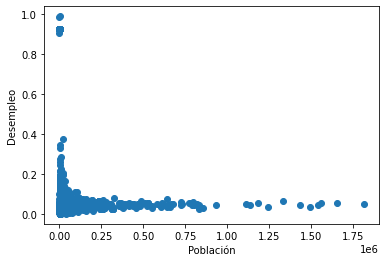

In [390]:
plt.scatter(x, y)
plt.xlabel("Población")
plt.ylabel("Desempleo")

No parece realmente que la variable población explique mucho el desempleo, aunque sí parece que en grandes poblaciones la tasa es muy baja siempre. Usemos una regresión para analizar si la población tiene alguna clase de impacto en el desempleo.

In [392]:
# Usamos la clase OLS de la biblioteca statsmodels, con nuestras variables x e y
mod = sm.OLS(y, x)

In [393]:
# Ajustamos el modelo de regresión con el método fit()
results = mod.fit()

In [394]:
# Obtenemos los resultados de nuestra regresión
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Unemploy   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.014
Method:                 Least Squares   F-statistic:                              37.30
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    1.17e-09
Time:                        10:23:42   Log-Likelihood:                          1545.5
No. Observations:                2552   AIC:                                     -3089.
Df Residuals:                    2551   BIC:                                     -3083.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
POBTOT      1.123e-07   1.84e-08      6.107      0.000    7.62e-08    1.48e-07
==============================================================================
Omnibus:                     3057.684   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           228904.999
Skew:                           6.558   Prob(JB):                         0.00
Kurtosis:                      47.505   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No ahondaré en la teoría de la regresión, pero uno puede extraer los valores típicos de una regresión:
- betas, que en este caso es el coeficiente de la variable `Unemploy`: 1.414e+05
- error estándar, `std err`: 1.11e04
- estadístico t y su valor p
- intervalos de confianza al 95%
- coeficientes de sesgo (skew) y curtosis
- coeficiente durbin-watson de autocorrelación (usado en series de tiempo)
- coeficiente de normalidad Jarque-Bera para los errores

In [395]:
results.params

POBTOT    1.122665e-07
dtype: float64

In [396]:
# notemos que no hicimos una regresión con constante, ahora veremos como agregarla
results.k_constant

0

In [397]:
results.tvalues

POBTOT    6.107138
dtype: float64

In [398]:
results.pvalues

POBTOT    1.169322e-09
dtype: float64

In [399]:
results.conf_int()

,0,1
POBTOT,7.621970e-08,1.483133e-07


Si quisiéramos agregar una ordenada al origen a esta regresión, basta con agregar:

In [409]:
x = df_filt["POBTOT"]
x_c = sm.add_constant(x)

y = df_filt["Unemploy"]

mod = sm.OLS(y, x_c)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Unemploy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.339
Date:                Sat, 17 Oct 2020   Prob (F-statistic):             0.0678
Time:                        10:41:55   Log-Likelihood:                 1794.4
No. Observations:                2552   AIC:                            -3585.
Df Residuals:                    2550   BIC:                            -3573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0593      0.003     23.437      0.000       0.054       0.064
POBTOT      -3.25e-08   1.78e-08     -1.827      0.068   -6.74e-08    2.38e-09
==============================================================================
Omnibus:                     3087.436   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238087.866
Skew:                           6.661   Prob(JB):                         0.00
Kurtosis:                      48.405   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como pueden ver, aquí sí tenemos un coeficiente $\beta_0$ para la estimación de la constante.

Si quisiéramos ahora usar esta info para graficar una recta en nuestros datos, podemos usar el intercepto y la pendiente para definir una recta. Recordemos que la ecuación de una recta es: $ y = mx+b $, con $m$ la pendiente y $b$ el intercepto y.

In [410]:
results.params

const     5.928413e-02
POBTOT   -3.249620e-08
dtype: float64

In [411]:
def plot_regression(x, y, results, xlabel, ylabel):
    b, m = results.params
    print("intercept: ", b, "slope:", m)
    
    #graficaremos la recta desde el mínimo hasta el máximo de x
    lb = int(round(x.min(),0))
    ub = int(round(x.max(),0))
    n=1000
    step = (ub-lb)/n
    print("bounds:", lb, ub)
    
    # puntos para la gráfica
    regline_x = [lb + i*step for i in range(n)]
    regline_y = [m*i+b for i in regline_x]
    
    plt.scatter(x, y)
    plt.plot(regline_x, regline_y, color='red')
    plt.xlabel(xlabel) ## cambiar nombre manual
    plt.ylabel(ylabel)

In [412]:
x.min(), x.max()

(0.0, 1815786.0)

In [413]:
lb = int(round(x.min(),0))
ub = int(round(x.max(),0))
n=1000
step = (ub-lb)/n
print("bounds:", lb, ub)
print(step)

bounds: 0 1815786
1815.786


In [414]:
regline_x = [lb + i*step for i in range(n)]
regline_x

[0.0,
 1815.786,
 3631.572,
 5447.358,
 7263.144,
 9078.93,
 10894.716,
 12710.502,
 14526.288,
 16342.074,
 18157.86,
 19973.646,
 21789.432,
 23605.218,
 25421.004,
 27236.79,
 29052.576,
 30868.362,
 32684.148,
 34499.934,
 36315.72,
 38131.506,
 39947.292,
 41763.078,
 43578.864,
 45394.65,
 47210.436,
 49026.222,
 50842.008,
 52657.794,
 54473.58,
 56289.366,
 58105.152,
 59920.938,
 61736.724,
 63552.51,
 65368.296,
 67184.082,
 68999.868,
 70815.65400000001,
 72631.44,
 74447.226,
 76263.012,
 78078.79800000001,
 79894.584,
 81710.37,
 83526.156,
 85341.94200000001,
 87157.728,
 88973.514,
 90789.3,
 92605.08600000001,
 94420.872,
 96236.658,
 98052.444,
 99868.23000000001,
 101684.016,
 103499.802,
 105315.588,
 107131.37400000001,
 108947.16,
 110762.946,
 112578.732,
 114394.51800000001,
 116210.304,
 118026.09,
 119841.876,
 121657.66200000001,
 123473.448,
 125289.234,
 127105.02,
 128920.80600000001,
 130736.592,
 132552.378,
 134368.164,
 136183.95,
 137999.736,
 139815.5

In [415]:
regline_y = [m*i+b for i in regline_x]
regline_y

[0.059284130263344836,
 0.059225124127010885,
 0.05916611799067694,
 0.05910711185434299,
 0.059048105718009045,
 0.05898909958167509,
 0.05893009344534115,
 0.0588710873090072,
 0.05881208117267325,
 0.0587530750363393,
 0.05869406890000536,
 0.058635062763671406,
 0.05857605662733746,
 0.05851705049100351,
 0.058458044354669565,
 0.058399038218335614,
 0.05834003208200167,
 0.05828102594566772,
 0.05822201980933377,
 0.05816301367299982,
 0.05810400753666587,
 0.058045001400331926,
 0.057985995263997975,
 0.05792698912766403,
 0.05786798299133008,
 0.057808976854996134,
 0.05774997071866218,
 0.05769096458232824,
 0.05763195844599429,
 0.05757295230966034,
 0.05751394617332639,
 0.05745494003699245,
 0.057395933900658495,
 0.05733692776432455,
 0.0572779216279906,
 0.057218915491656655,
 0.057159909355322704,
 0.05710090321898876,
 0.05704189708265481,
 0.056982890946320856,
 0.05692388480998691,
 0.05686487867365296,
 0.056805872537319016,
 0.056746866400985065,
 0.05668786026465112

intercept:  0.059284130263344836 slope: -3.249619522011301e-08
bounds: 0 1815786


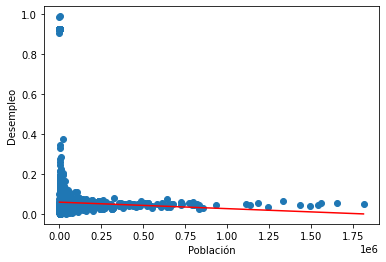

In [416]:
plot_regression(x, y, results, "Población", "Desempleo")

In [417]:
results.rsquared

0.001307562131012241

Típicamente nos fijamos en la $R^2$ para ver qué tan bien explica el modelo nuestros datos. En este caso, la $R^2$ no tiene nada que ver con causalidad del modelo, solo con qué tan bien sirve x para explicar y.

Si quisiéramos únicamente ver cuál de las variables del censo nos ayuda a explicar mejor el desempleo, podríamos fijarnos en las $R^2$ de diferentes modelos y usar el que mayor $R^2$ tenga.

### Ejercicio
Ahora intenta buscar alguna variable que explique mejor el desempleo. Puedes ir manualmente corriendo todas las regresiones, pero lo mejor sería hacer un loop para ver qué modelo tiene la $R^2$ más alta.

In [418]:
## aquí tu código
df_filt.columns

## Paso 1: haz una función que corra una regresión y obtenga la r2
def get_reg_r2(df, x_col, y_col):
    '''
    inputs:
        x_col, nombre de la columna que servirá como variable independiente
        y_col, nombre de la columna que servirá como variable dependiente
    output: r2
    '''
    x = df[x_col]
    x_c = sm.add_constant(x)
    y = df[y_col]
    mod = sm.OLS(y, x_c)
    results = mod.fit()
    r2 = results.rsquared
    return r2
    

## Paso 2: para todas las variables en tu dataframe, corre la función
## guardando aquella variable que tenga la r2 más grande




## Nota: aguas con algunas variables del tipo categórico. Antes de usarlas en una regresión
## deberías convertirlas a un tipo numérico. Exclúyelas si no sabes cómo.

In [419]:
get_reg_r2(df_filt, "POBTOT", "Unemploy")

0.001307562131012241

In [420]:
df_filt.columns

Index(['year', 'CVEGEO', 'X.1', 'X', 'POBTOT', 'Men', 'Women', 'SinSS',
       'InMigrants', 'Illiterate', 'GRADOESCO', 'IndigenouL', 'PISONTIERRA',
       'NSERVICIO', 'VP_SBIENE', 'TV', 'REFRI', 'WASHER', 'PHONE', 'CAR',
       'JEFAM', 'PISOTIERRA', 'PC', 'CEL', 'INTER', 'Unemploy', 'POB_TOT',
       'GM', 'Rural', 'ZMCONURB', 'ZM', 'ENT', 'PRO_OVP'],
      dtype='object')

In [422]:
cols = ['Men', 'Women', 'SinSS', 'InMigrants', 'Illiterate', 'GRADOESCO', 
        'IndigenouL', 'PISONTIERRA','NSERVICIO', 'VP_SBIENE', 'TV', 'REFRI',
        'WASHER', 'PHONE', 'CAR', 'JEFAM', 'PISOTIERRA', 'PC', 'CEL', 'INTER',
        'Rural', 'ZMCONURB', 'ZM', 'ENT', 'PRO_OVP'] #no uso GM por ser categórica

for col in cols:
    print(col, round(get_reg_r2(df_filt, col, "Unemploy"), 4))

Men 0.0226
Women 0.0001
SinSS 0.0026
InMigrants 0.0165
Illiterate 0.0029
GRADOESCO 0.0069
IndigenouL 0.0134
PISONTIERRA 0.031
NSERVICIO 0.0276
VP_SBIENE 0.0079
TV 0.0175
REFRI 0.0075
WASHER 0.0066
PHONE 0.0
CAR 0.002
JEFAM 0.0156
PISOTIERRA 0.031
PC 0.0042
CEL 0.0144
INTER 0.0061
Rural 0.0036
ZMCONURB 0.0035
ZM 0.0025
ENT 0.0001
PRO_OVP 0.014


In [424]:
cols = ['Men', 'Women', 'SinSS', 'InMigrants', 'Illiterate', 'GRADOESCO', 
        'IndigenouL', 'PISONTIERRA','NSERVICIO', 'VP_SBIENE', 'TV', 'REFRI',
        'WASHER', 'PHONE', 'CAR', 'JEFAM', 'PISOTIERRA', 'PC', 'CEL', 'INTER',
        'Rural', 'ZMCONURB', 'ZM', 'ENT', 'PRO_OVP'] #no uso GM por ser categórica

max_r2 = 0
max_col = None

for c in cols:
    curr_r2 = get_reg_r2(df_filt, c, "Unemploy")
    if curr_r2 > max_r2:
        print("New best model uses:", c)
        max_r2 = curr_r2
        max_col = c
        

New best model uses: Men
New best model uses: PISONTIERRA


In [425]:
max_col, max_r2

('PISONTIERRA', 0.031044796547226472)

In [426]:
## deberíamos guardar la mejor regresión en algún lado para 
# evitar correrla de nuevo, pero así nos funciona por ahora
x = df_filt[max_col]
x_c = sm.add_constant(x)
y = df_filt["Unemploy"]
mod = sm.OLS(y, x_c)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Unemploy   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     81.70
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           3.05e-19
Time:                        10:59:11   Log-Likelihood:                 1833.0
No. Observations:                2552   AIC:                            -3662.
Df Residuals:                    2550   BIC:                            -3650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0353      0.003     10.356      0.000       0.029       0.042
PISONTIERRA     0.1746      0.019      9.039      0.000       0.137       0.212
==============================================================================
Omnibus:                     2961.077   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202200.253
Skew:                           6.227   Prob(JB):                         0.00
Kurtosis:                      44.791   Cond. No.                         8.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

intercept:  0.035275447853214174 slope: 0.1745720125295924
bounds: 0 1


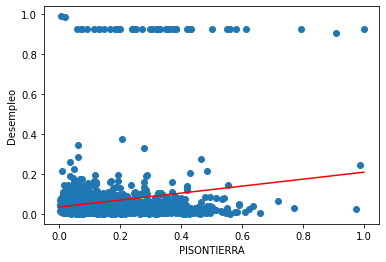

In [427]:
plot_regression(x, y, results, max_col, "Desempleo")

### 6.2 Regresión lineal múltiple

Basta decir que no parece que el % de hogares con piso de tierra ayude a explicar muy bien el desempleo. ¿Qué tal que no es solo un factor sino un grupo de factores que nos ayudan a explicarlo mejor? La regresión lineal múltiple nos ayuda a incorporar más de una variable explicativa al modelo, intentando ajustar ahora no una línea, sino un plano al conjunto de datos.

La nueva respuesta es solución a la ecuación:
<center> $ \underset{\beta}{\textrm{min}}$ $Y - (X\beta + \epsilon) = 0$ </center> 

Donde $Y$ es la variable dependiente, $\beta$ es un vector de "pesos" para cada variable independiente y $X$ es nuestro vector de variables explicativas.

### Ejemplo, de vuelta al censo
Intentemos usar un grupo mayor de variables para explicar el desempleo. ¿Qué variables parecen ayudar mejor? Grafiquémoslas:

In [259]:
len(cols)

25

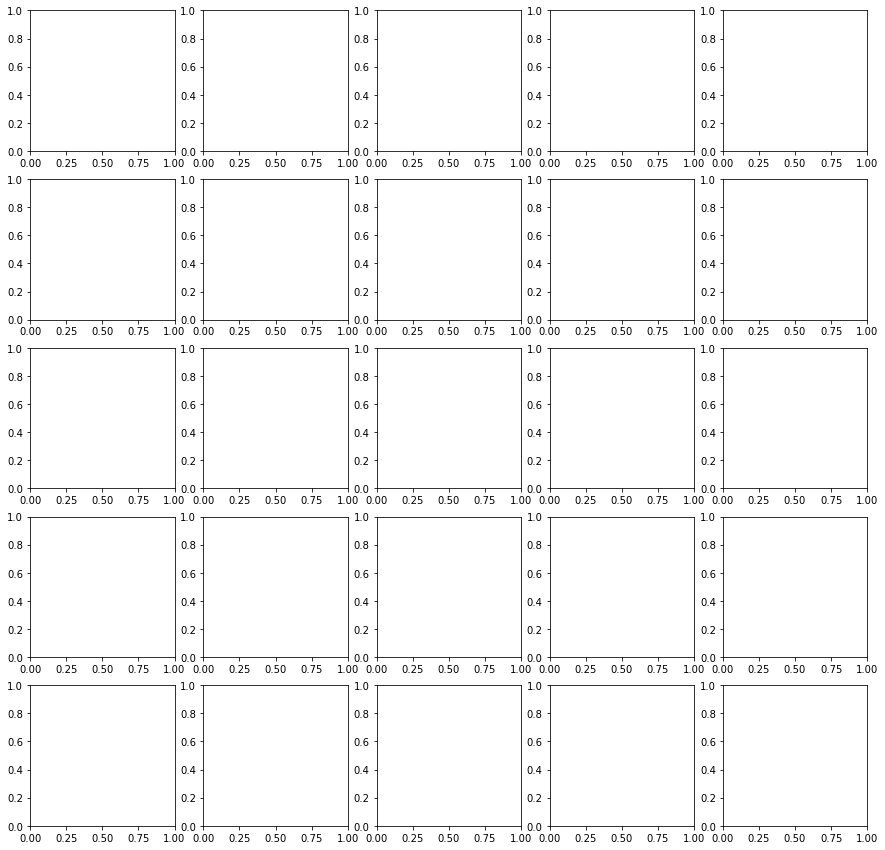

In [260]:
# Hagamos gráficas para facilitarnos la vida

# Definimos un grid donde pondremos las gráficas
width = 5
height = 5

fig, ax = plt.subplots(width, height, figsize=(15,15))
plt.show()

In [428]:
df_filt

,year,CVEGEO,X.1,X,POBTOT,Men,Women,SinSS,InMigrants,Illiterate,...,CEL,INTER,Unemploy,POB_TOT,GM,Rural,ZMCONURB,ZM,ENT,PRO_OVP
25441,2010,10001,25053,25053,31401.0,0.497850,0.502150,0.310723,0.014586,0.034818,...,0.501775,0.077079,0.040144,31401.0,Bajo,0,0,0,10,3.95
25442,2010,10002,25054,25054,4122.0,0.525230,0.474770,0.322416,0.014556,0.138837,...,0.037075,0.007209,0.038765,4122.0,Muy alto,1,0,0,10,4.25
25443,2010,10003,25055,25055,4530.0,0.495364,0.504636,0.309934,0.005960,0.048365,...,0.392614,0.005831,0.037453,4530.0,Medio,0,0,0,10,4.38
25444,2010,10004,25056,25056,33664.0,0.503832,0.496168,0.289211,0.022665,0.040885,...,0.502153,0.060751,0.080088,33664.0,Bajo,0,0,0,10,4.02
25445,2010,10005,25057,25057,582267.0,0.483802,0.516198,0.285029,0.022146,0.021565,...,0.709106,0.256409,0.050995,582267.0,Muy bajo,0,0,0,10,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28328,2010,9013,25048,25048,415007.0,0.494702,0.505298,0.431636,0.019024,0.027107,...,0.718588,0.310144,0.047660,415007.0,Muy bajo,0,1,1,9,3.98
28329,2010,9014,25049,25049,385439.0,0.457686,0.542314,0.244926,0.049684,0.005577,...,0.829487,0.639909,0.039602,385439.0,Muy bajo,0,1,1,9,2.70
28330,2010,9015,25050,25050,531831.0,0.473318,0.526682,0.321337,0.042320,0.014207,...,0.763742,0.427660,0.042969,531831.0,Muy bajo,0,1,1,9,3.03
28331,2010,9016,25051,25051,372889.0,0.463052,0.536948,0.238165,0.058701,0.011999,...,0.786190,0.516167,0.037671,372889.0,Muy bajo,0,1,1,9,3.10


In [430]:
cols[0]

'Men'

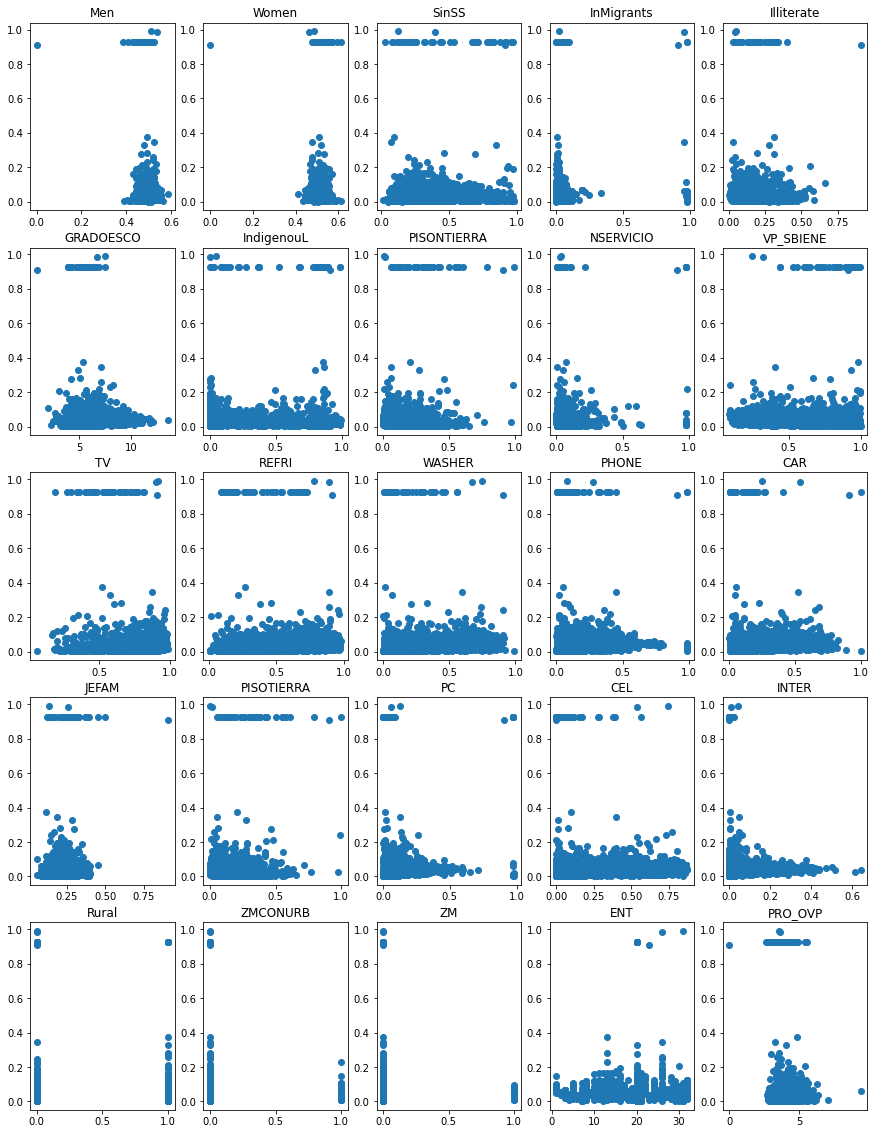

In [431]:
# para cada una de las columnas disponibles, hay que
# filtrar x - luego graficarlo vs y:

y = df_filt["Unemploy"] #fijo
count = 0  #para loopear a través de la lista cols

fig, ax = plt.subplots(width, height,figsize=(15,20))
# loop through all the plots we'll create
for i in range(width):
    for j in range(height):
        # obtengamos x
        var = cols[count]
        x = df_filt[var]
        ax[i,j].scatter(x,y)
        ax[i,j].set_title(var)
        
        count += 1 #añadir para seguir el loop
        
plt.show()

¡Qué difícil! A simple vista no parece que nada nos ayude a mejorar esa predicción del desempleo. ¿Qué tal que quitamos esos registros donde parece haber desempleo muy alto?

In [434]:
df_filt["Unemploy"] < 0.8

25441    True
25442    True
25443    True
25444    True
25445    True
         ... 
28328    True
28329    True
28330    True
28331    True
28332    True
Name: Unemploy, Length: 2552, dtype: bool

In [432]:
df_filt_new = df_filt.loc[df_filt["Unemploy"] < 0.8]
df_filt_new.shape[0]

2508

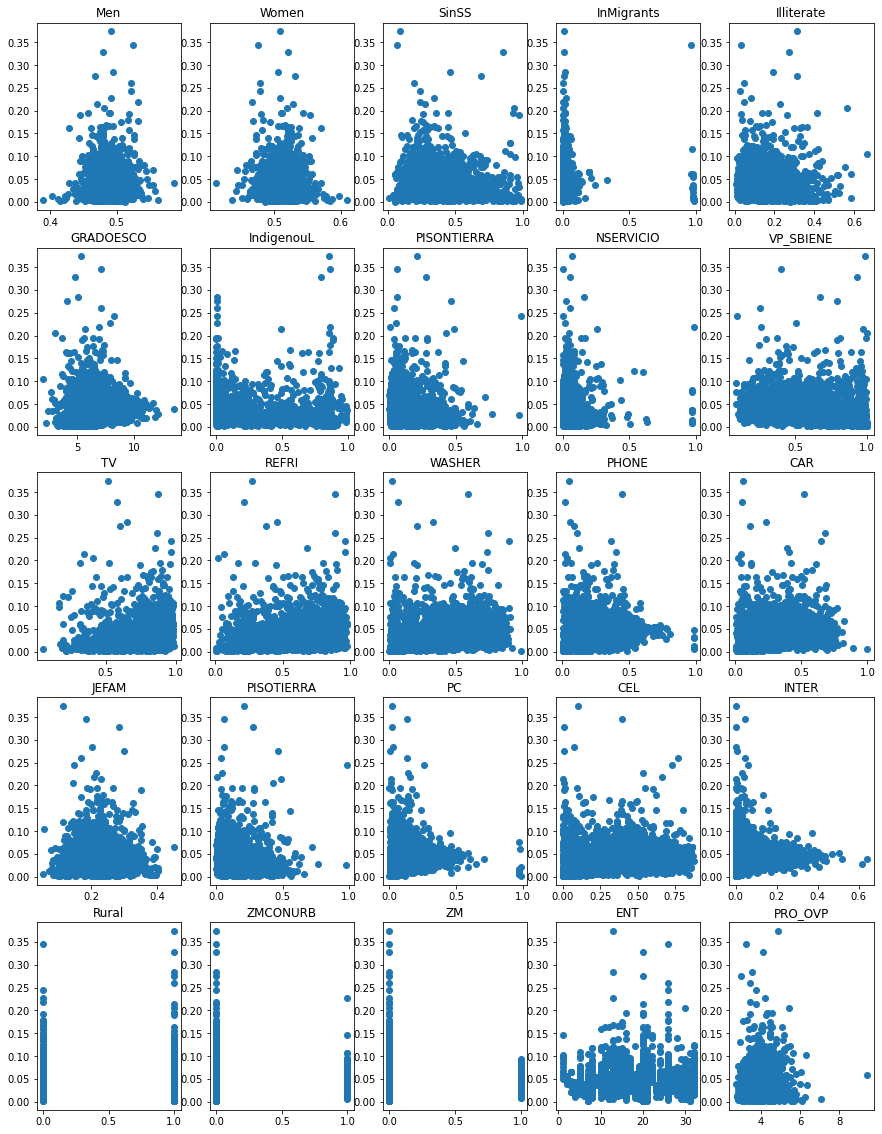

In [433]:
# repetimos el paso anterior pero con df_filt_new

y = df_filt_new["Unemploy"] #fijo
count = 0  #para loopear a través de la lista cols

fig, ax = plt.subplots(width, height,figsize=(15,20))
# loop through all the plots we'll create
for i in range(width):
    for j in range(height):
        # obtengamos x
        var = cols[count]
        x = df_filt_new[var]
        ax[i,j].scatter(x,y)
        ax[i,j].set_title(var)
        
        count += 1 #añadir para seguir el loop
        
plt.show()

Seguimos sin poder ver una relación muy clara. Hay métodos para transformar las variables y seguir buscando algo que nos ayude a explicar mejor nuestra variable de interés. Sin embargo, esta no es una clase de regresiones, así que no ahondaremos en ese tema.

Intentemos hacer ahora una regresión múltiple con más de una variable. Idealmente, la $R^2$ ajustada incrementaría, diciendo que esa combinación de variables es mejor para predecir el desempleo.

In [436]:
# tan fácil y tan sencillo como solo agarrar una lista de variables en 
# vez de una sola variable para x
x = df_filt_new[["ZM", "PHONE"]]

# añadimos intercepto
x_c = sm.add_constant(x)
y = df_filt_new["Unemploy"]
mod = sm.OLS(y, x_c)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Unemploy   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     20.71
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.20e-09
Time:                        11:29:43   Log-Likelihood:                 5104.8
No. Observations:                2508   AIC:                        -1.020e+04
Df Residuals:                    2505   BIC:                        -1.019e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0361      0.001     30.652      0.000       0.034       0.038
ZM            -0.0038      0.002     -1.954      0.051      -0.008    1.37e-05
PHONE          0.0283      0.004      6.415      0.000       0.020       0.037
==============================================================================
Omnibus:                     1744.351   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37911.075
Skew:                           3.009   Prob(JB):                         0.00
Kurtosis:                      21.071   Cond. No.                         7.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [438]:
results.rsquared_adj

0.015480448986192608

Si queremos repetir el ejercicio anterior, y ver qué par de variables funcionan mejor, podríamos hacer un loop similar.

### Ejercicio
Encuentra el par de variables que explique mejor el desempleo. Haz un loop para ver qué modelo tiene la $R^2$ ajustada más alta.

In [273]:
## aquí tu código
## Paso 1: haz una función que corra una regresión y obtenga la r2 ajustada
def get_reg_r2_adj(df, x_cols, y_col):
    '''
    inputs:
        x_col, lista con nombre de las columnas que servirá como variable independiente
        y_col, nombre de la columna que servirá como variable dependiente
    output: r2
    '''
    x = df[x_cols]
    x_c = sm.add_constant(x)
    y = df[y_col]
    mod = sm.OLS(y, x_c)
    results = mod.fit()
    r2 = results.rsquared_adj # cambio vs versión anterior
    return r2
    

## Paso 2: para todos los pares de variables en tu dataframe, corre la función anterior
## guardando aquella variable que tenga la r2 más grande


## Nota: aguas con algunas variables del tipo categórico. Antes de usarlas en una regresión
## deberías convertirlas a un tipo numérico. Exclúyelas si no sabes cómo.

In [439]:
get_reg_r2_adj(df_filt_new, ["ZM", "PHONE"], "Unemploy")

0.015480448986192608

In [440]:
cols = ['Men', 'Women', 'SinSS', 'InMigrants', 'Illiterate', 'GRADOESCO', 
        'IndigenouL', 'PISONTIERRA','NSERVICIO', 'VP_SBIENE', 'TV', 'REFRI',
        'WASHER', 'PHONE', 'CAR', 'JEFAM', 'PISOTIERRA', 'PC', 'CEL', 'INTER',
        'Rural', 'ZMCONURB', 'ZM', 'ENT', 'PRO_OVP'] #no uso GM por ser categórica

import timeit #i want to take time
start = timeit.default_timer()


max_r2 = 0
max_col = None

# Este podría ser una forma de hacerlo. El problema?
# Estamos repitiendo pares de columnas: [Men, Women] y [Women, Men]
for c1 in cols:
    for c2 in cols:
        if c1 != c2:
            curr_r2 = get_reg_r2_adj(df_filt_new, [c1, c2], "Unemploy")
            if curr_r2 > max_r2:
                print("New best model uses:", c1, c2)
                max_r2 = curr_r2
                max_col = [c1, c2]
                
stop = timeit.default_timer()
print('It took: ', round(stop - start, 4), "seconds")  

New best model uses: Men Women
New best model uses: Men SinSS
New best model uses: Men VP_SBIENE
New best model uses: Men CAR
New best model uses: Women CAR
New best model uses: SinSS CAR
New best model uses: Illiterate CAR
New best model uses: CAR PC
New best model uses: CAR Rural
It took:  1.8627 seconds


In [441]:
max_col, max_r2

(['CAR', 'Rural'], 0.061612127394193084)

In [443]:
cols

['Men',
 'Women',
 'SinSS',
 'InMigrants',
 'Illiterate',
 'GRADOESCO',
 'IndigenouL',
 'PISONTIERRA',
 'NSERVICIO',
 'VP_SBIENE',
 'TV',
 'REFRI',
 'WASHER',
 'PHONE',
 'CAR',
 'JEFAM',
 'PISOTIERRA',
 'PC',
 'CEL',
 'INTER',
 'Rural',
 'ZMCONURB',
 'ZM',
 'ENT',
 'PRO_OVP']

In [446]:
for i in range(len(cols)):
    print("i:", i, cols[i])
    for j in range(i+1, len(cols)):
        print("j:", j, cols[j])

i: 0 Men
j: 1 Women
j: 2 SinSS
j: 3 InMigrants
j: 4 Illiterate
j: 5 GRADOESCO
j: 6 IndigenouL
j: 7 PISONTIERRA
j: 8 NSERVICIO
j: 9 VP_SBIENE
j: 10 TV
j: 11 REFRI
j: 12 WASHER
j: 13 PHONE
j: 14 CAR
j: 15 JEFAM
j: 16 PISOTIERRA
j: 17 PC
j: 18 CEL
j: 19 INTER
j: 20 Rural
j: 21 ZMCONURB
j: 22 ZM
j: 23 ENT
j: 24 PRO_OVP
i: 1 Women
j: 2 SinSS
j: 3 InMigrants
j: 4 Illiterate
j: 5 GRADOESCO
j: 6 IndigenouL
j: 7 PISONTIERRA
j: 8 NSERVICIO
j: 9 VP_SBIENE
j: 10 TV
j: 11 REFRI
j: 12 WASHER
j: 13 PHONE
j: 14 CAR
j: 15 JEFAM
j: 16 PISOTIERRA
j: 17 PC
j: 18 CEL
j: 19 INTER
j: 20 Rural
j: 21 ZMCONURB
j: 22 ZM
j: 23 ENT
j: 24 PRO_OVP
i: 2 SinSS
j: 3 InMigrants
j: 4 Illiterate
j: 5 GRADOESCO
j: 6 IndigenouL
j: 7 PISONTIERRA
j: 8 NSERVICIO
j: 9 VP_SBIENE
j: 10 TV
j: 11 REFRI
j: 12 WASHER
j: 13 PHONE
j: 14 CAR
j: 15 JEFAM
j: 16 PISOTIERRA
j: 17 PC
j: 18 CEL
j: 19 INTER
j: 20 Rural
j: 21 ZMCONURB
j: 22 ZM
j: 23 ENT
j: 24 PRO_OVP
i: 3 InMigrants
j: 4 Illiterate
j: 5 GRADOESCO
j: 6 IndigenouL
j: 7 PISONTIERR

In [447]:
start = timeit.default_timer()

max_r2 = 0
max_col = None

# Misma respuesta en la mitad de tiempo
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        c1 = cols[i]
        c2 = cols[j]
        curr_r2 = get_reg_r2_adj(df_filt_new, [c1, c2], "Unemploy")
        if curr_r2 > max_r2:
            print("New best model uses:", c1, c2)
            max_r2 = curr_r2
            max_col = [c1, c2]

stop = timeit.default_timer()
print('It took: ', round(stop - start, 4), "seconds")  

New best model uses: Men Women
New best model uses: Men SinSS
New best model uses: Men VP_SBIENE
New best model uses: Men CAR
New best model uses: Women CAR
New best model uses: SinSS CAR
New best model uses: Illiterate CAR
New best model uses: CAR PC
New best model uses: CAR Rural
It took:  0.8973 seconds


No hay mucho problema con tardar un segundo extra. Pero imagínate si quisieras correr esto con más variables y más combinaciones! Un segundo por cada posible combinación de variables puede incrementar tu tiempo de cálculo muy rápidamente. Así que recuerda hacer algoritmos eficientes!

In [448]:
max_col

['CAR', 'Rural']

In [449]:
x = df_filt_new[max_col]
x_c = sm.add_constant(x)
y = df_filt_new["Unemploy"]
mod = sm.OLS(y, x_c)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Unemploy   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     83.30
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           9.44e-36
Time:                        11:45:39   Log-Likelihood:                 5165.0
No. Observations:                2508   AIC:                        -1.032e+04
Df Residuals:                    2505   BIC:                        -1.031e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0356      0.002     21.132      0.000       0.032       0.039
CAR            0.0303      0.004      7.886      0.000       0.023       0.038
Rural         -0.0071      0.001     -4.795      0.000      -0.010      -0.004
==============================================================================
Omnibus:                     1886.392   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49842.446
Skew:                           3.305   Prob(JB):                         0.00
Kurtosis:                      23.815   Cond. No.                         7.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recap `statsmodels`
Hay todo un universo allá afuera de lo que se puede hacer con la biblioteca `statsmodels`. Su fuerte son Regresiones y Series de Tiempo. Dentro de las Regresiones hay:
    - Modelos lineales generalizados (GLM)
    - Modelos lineales con efectos mixtos
    - Fixed Effects/Random Effects
    - Análisis ANOVA
    - Etc.

Es imposible cubrir todo este material, ya que además requiere otro tipo de conocimientos fuera del alcance de este curso. Sin embargo, lo que hemos cubierto hasta ahora debería ayudarte a aprovechar lo que ya sabes de este tipo de modelos para poder generar múltiples combinaciones de variables y ver rápidamente qué es lo mejor para tu modelo predictivo.

### 6.3 Series de Tiempo
Como mencionamos, `statsmodels` también tiene una gran variedad de modelos de series de tiempo. No me adentraré demasiado en la teoría, ya que tampoco es el alcance de este curso.

#### Modelos Autoregresivos: AR(p)
https://en.wikipedia.org/wiki/Autoregressive_model
Un modelo autoregresivo de orden $p$ es básicamente una regresión, donde uno de los términos explicativos es la variable dependiente en un periodo pasado $p$. Por ejemplo: $y_t = f(y_{t-1}) + \epsilon$ sería un AR(1).

In [279]:
# tomemos un único municipio con CVEGEO 10001
df_filt = df.loc[df["CVEGEO"] == 10001]

In [280]:
df_filt

,year,CVEGEO,X.1,X,POBTOT,Men,Women,SinSS,InMigrants,Illiterate,...,CEL,INTER,Unemploy,POB_TOT,GM,Rural,ZMCONURB,ZM,ENT,PRO_OVP
1,2000,10001,293,293,31291.000000,0.492921,0.507079,0.630021,0.022243,0.052219,...,0.000000,0.000000e+00,0.013273,31291.000000,Bajo,0,0,0,10,4.290000
2893,2001,10001,2834,2834,30903.600000,0.492906,0.507094,0.626222,0.019627,0.051136,...,0.000000,0.000000e+00,0.015960,30903.600000,Bajo,0,0,0,10,4.248000
5350,2002,10001,5291,5291,30516.200000,0.492891,0.507109,0.622422,0.017011,0.050054,...,0.000000,0.000000e+00,0.018647,30516.200000,Bajo,0,0,0,10,4.206000
7807,2003,10001,7748,7748,30128.800000,0.492876,0.507124,0.618623,0.014396,0.048971,...,0.000000,0.000000e+00,0.021334,30128.800000,Bajo,0,0,0,10,4.164000
10264,2004,10001,10205,10205,29741.400000,0.492861,0.507139,0.614824,0.011780,0.047889,...,0.000000,0.000000e+00,0.024021,29741.400000,Bajo,0,0,0,10,4.122000
12721,2005,10001,12673,12673,29354.000000,0.492846,0.507154,0.611024,0.009164,0.046806,...,0.000000,4.336809e-19,0.026708,29354.000000,Bajo,0,0,0,10,4.080000
15613,2006,10001,15214,15214,29763.400000,0.493847,0.506153,0.550964,0.010248,0.044408,...,0.100355,1.541582e-02,0.029395,29763.400000,Bajo,0,0,0,10,4.054000
18070,2007,10001,17671,17671,30172.800000,0.494848,0.505152,0.490903,0.011333,0.042011,...,0.200710,3.083164e-02,0.032083,30172.800000,Bajo,0,0,0,10,4.028000
20527,2008,10001,20128,20128,30582.200000,0.495849,0.504151,0.430843,0.012417,0.039613,...,0.301065,4.624747e-02,0.034770,30582.200000,Bajo,0,0,0,10,4.002000
22984,2009,10001,22585,22585,30991.600000,0.496849,0.503151,0.370783,0.013501,0.037215,...,0.401420,6.166329e-02,0.037457,30991.600000,Bajo,0,0,0,10,3.976000


Supongamos que queremos hacer un modelo que nos ayude a predecir la variable InMigrants para los próximos años. ¿Cómo le hacemos con un modelo autoregresivo?

In [281]:
from statsmodels.tsa.ar_model import AutoReg

data = df_filt["InMigrants"]

# lags es una lista donde podemos poner cuántos periodos pasados queremos
# usar para predecir el futuro. La ecuación del principio corresponde a un 
# lag de 1, en términos formales es un modelo autoregresivo de orden 1, o AR(1).
res = AutoReg(data, lags = [1]).fit()

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [283]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             InMigrants   No. Observations:                   17
Model:                     AutoReg(1)   Log Likelihood                  76.413
Method:               Conditional MLE   S.D. of innovations              0.002
Date:                Fri, 16 Oct 2020   AIC                            -12.015
Time:                        22:38:26   BIC                            -11.870
Sample:                             1   HQIC                           -12.007
                                   17                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -0.0002      0.002     -0.121      0.904      -0.004       0.003
InMigrants.L1     1.0342      0.105      9.816      0.000       0.828       1.241
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9669           +0.0000j            0.9669            0.0000
-----------------------------------------------------------------------------
"""

In [284]:
# igual que con la regresión, podemos obtener los parámetros
# de la serie de tiempo
res.params

intercept       -0.000218
InMigrants.L1    1.034246
dtype: float64

In [318]:
def plot_ar_model(x, results, xlabel, ar_order):
    b, m = results.params
    print("intercept: ", b, "slope:", m)
    n = len(x)
    
    # puntos para la gráfica
    regline_x = [i for i in range(n)]
    regline_y = [m*i+b for i in x[ar_order:]]
    
    plt.scatter(regline_x, x)
    plt.plot(regline_x[ar_order:], regline_y, color='red')
    plt.xlabel(xlabel) ## cambiar nombre manual
    plt.show()

intercept:  -0.00021761890015375377 slope: 1.0342463605924568


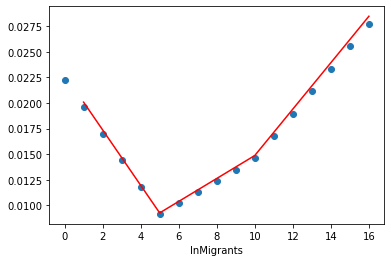

In [313]:
plot_ar_model(data, res, "InMigrants", 1)

Interesante! Misterioso overfitting?¿Qué pasa si usamos un orden 2 en vez de 1?

intercept:  0.002295006225532699 slope: 0.9026877745112285


/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


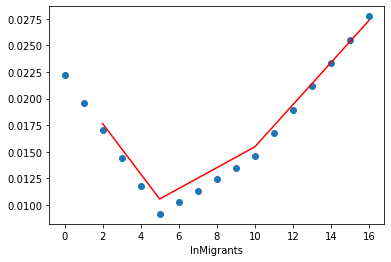

In [315]:
res = AutoReg(data, lags = [2]).fit()
plot_ar_model(data, res, "InMigrants", 2)

#### Ejercicio
Ejecuta modelos autoregresivos de orden p, con p de 1 hasta 10.

In [ ]:
### tu código aquí






intercept:  -0.00021761890015375377 slope: 1.0342463605924568


/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


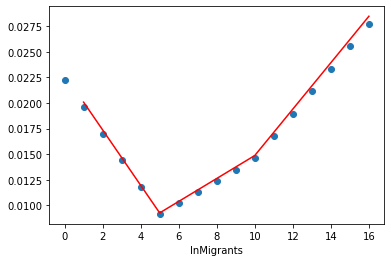

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


intercept:  0.002295006225532699 slope: 0.9026877745112285


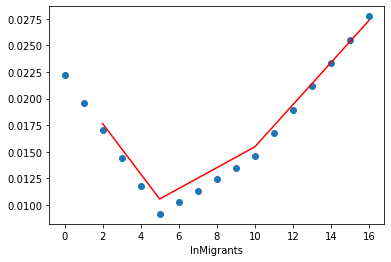

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


intercept:  0.008024040140415188 slope: 0.5563238590080439


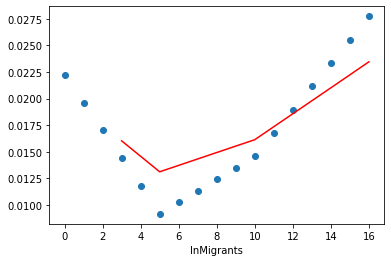

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


intercept:  0.016177115829479102 slope: 0.03254306316256639


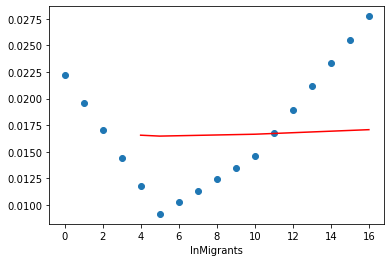

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


intercept:  0.02412032590736774 slope: -0.48920011745484165


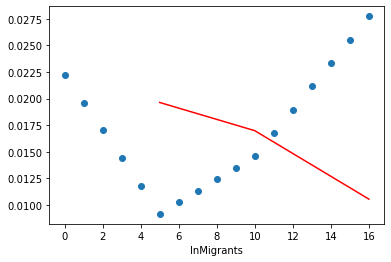

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


intercept:  0.028780966309336856 slope: -0.77401262753312


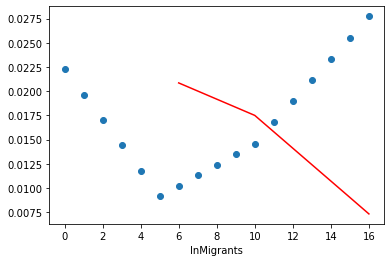

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


intercept:  0.03149670548108103 slope: -0.9145304033859503


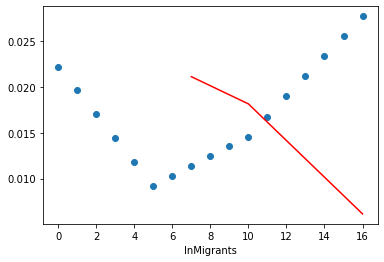

intercept:  0.033384801079784907 slope: -0.9860961574663145


/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


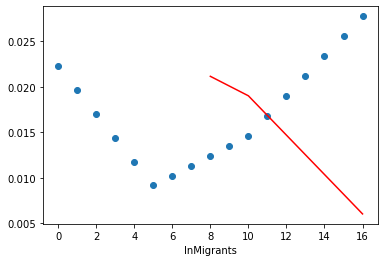

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


intercept:  0.03454364985071498 slope: -0.990821251316676


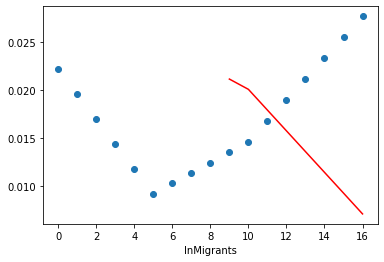

In [319]:
# Respuesta
for i in range(1,10):
    res = AutoReg(data, lags = [i]).fit()
    plot_ar_model(data, res, "InMigrants", i)

#### Gráficas de coeficientes de autocorrelación
La librería `statsmodels` trae muchas herramientas para el análisis de series de tiempo. Entre ellas, hay gráficas para los coeficientes de autocorrelación, que nos ayudan a determinar si hay estacionalidad en nuestros datos. Cuando tenemos autocorrelación muy alta cada x períodos, significa que tenemos que desestacionalizar la serie de tiempo.

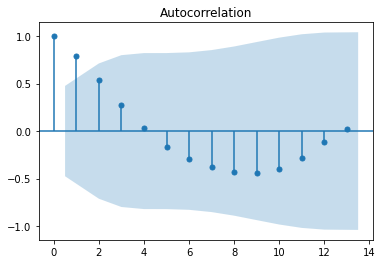

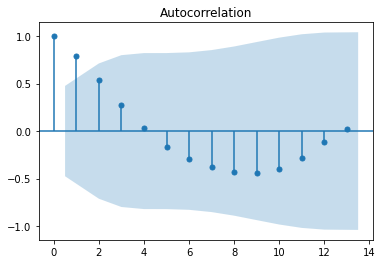

In [321]:
sm.graphics.tsa.plot_acf(data.values.squeeze())
#plot_ar_model(data, res, "InMigrants", i)

### 6.4 Regresión logística
Existe otra biblioteca que tiene herramientas para regresiones: `sklearn`. A diferencia de `statsmodels`, `sklearn` se enfoca en modelos predictivos y aprendizaje de máquinas, dejando de lado el análisis más estadístico que distingue a `statsmodels`. 

La biblioteca `sklearn` es masiva, tiene de todo para el mundo del aprendizaje de máquinas. Muchos conceptos están completamente fuera del alcance de este curso, pero la regresión logística es lo suficientemente parecida a una regresión lineal para que la veamos en esta sesión.

Una **regresión logística** es un tipo particular de regresión donde la variable dependiente $Y$ es una variable binaria o dummy, o sea que solo toma el valor 1 ó 0. El modelo logístico predice la probabilidad de que $Y=1$. 

Para una breve introducción a este modelo: https://en.wikipedia.org/wiki/Logistic_regression

#### Ejemplo con datos censales
Supongamos entonces que queremos determinar si un municipio es rural o no, usando el resto de la información del censo.

In [372]:
#Quitamos observaciones duplicadas
# luego filtremos los datos de un año -2010- para ejemplificar cómo funciona nuestra biblioteca
df_filt = df.loc[~df.duplicated()]
df_filt = df_filt.loc[df_filt["year"] == 2010]
df_filt

,year,CVEGEO,X.1,X,POBTOT,Men,Women,SinSS,InMigrants,Illiterate,...,CEL,INTER,Unemploy,POB_TOT,GM,Rural,ZMCONURB,ZM,ENT,PRO_OVP
25441,2010,10001,25053,25053,31401.0,0.497850,0.502150,0.310723,0.014586,0.034818,...,0.501775,0.077079,0.040144,31401.0,Bajo,0,0,0,10,3.95
25442,2010,10002,25054,25054,4122.0,0.525230,0.474770,0.322416,0.014556,0.138837,...,0.037075,0.007209,0.038765,4122.0,Muy alto,1,0,0,10,4.25
25443,2010,10003,25055,25055,4530.0,0.495364,0.504636,0.309934,0.005960,0.048365,...,0.392614,0.005831,0.037453,4530.0,Medio,0,0,0,10,4.38
25444,2010,10004,25056,25056,33664.0,0.503832,0.496168,0.289211,0.022665,0.040885,...,0.502153,0.060751,0.080088,33664.0,Bajo,0,0,0,10,4.02
25445,2010,10005,25057,25057,582267.0,0.483802,0.516198,0.285029,0.022146,0.021565,...,0.709106,0.256409,0.050995,582267.0,Muy bajo,0,0,0,10,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28328,2010,9013,25048,25048,415007.0,0.494702,0.505298,0.431636,0.019024,0.027107,...,0.718588,0.310144,0.047660,415007.0,Muy bajo,0,1,1,9,3.98
28329,2010,9014,25049,25049,385439.0,0.457686,0.542314,0.244926,0.049684,0.005577,...,0.829487,0.639909,0.039602,385439.0,Muy bajo,0,1,1,9,2.70
28330,2010,9015,25050,25050,531831.0,0.473318,0.526682,0.321337,0.042320,0.014207,...,0.763742,0.427660,0.042969,531831.0,Muy bajo,0,1,1,9,3.03
28331,2010,9016,25051,25051,372889.0,0.463052,0.536948,0.238165,0.058701,0.011999,...,0.786190,0.516167,0.037671,372889.0,Muy bajo,0,1,1,9,3.10


In [373]:
df_filt["Rural"].mean()  ## 38.9% de los municipios son rurales

0.38910658307210033

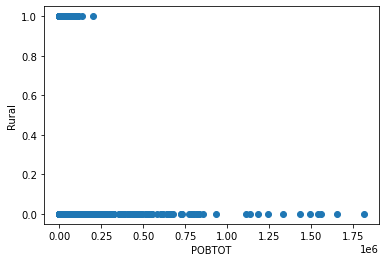

In [374]:
# Veamos primero los datos en una gráfica
y = df_filt["Rural"]
x = df_filt["POBTOT"]

plt.scatter(x, y)
plt.xlabel("POBTOT")
plt.ylabel("Rural")
plt.show()

In [375]:
# para usar regresión logistica en sklearn, necesitamos importar esta nueva biblioteca
from sklearn.linear_model import LogisticRegression

# los modelos en sklearn son medio roñosos y necesitan el input en una manera muy
# específica. La instrucción reshape convierte nuestro array de números, que tiene dimensión
# 0, a un array de dimensión 1. Si no hace sentido esto, no importa, lo que tienes que entender 
# es que hay que poner los datos en la forma que sklearn quiere y si no lo hacemos, tendremos un 
# bonito mensaje de error
y = y.values.reshape(-1,1)
x = x.values.reshape(-1,1)

# hacemos un objeto que "contiene" la regresión logística
clf = LogisticRegression()

# ajustamos el modelo a los datos
clf.fit(x,y)

# predecimos el valor de y (típicamente llamado y_hat, y_pred, y_est, etc.)
y_hat = clf.predict(x)

# y así podemos ver nuestra estimación
y_hat

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 0, 0, ..., 0, 0, 0])

In [376]:
# pues resulta que este modelo solo está prediciendo que el 0.3% de nuestros
# municipios son rurales, no parece hacerlo muy bien, huh?
y_hat.mean()

0.00039184952978056425

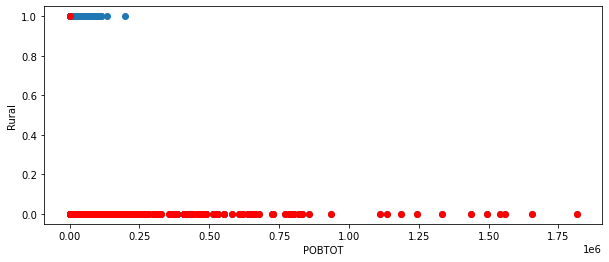

In [377]:
y = df_filt["Rural"]
x = df_filt["POBTOT"]

plt.figure(figsize=(10,4))
plt.scatter(x, y)
plt.scatter(x, y_hat, color="red")
plt.xlabel("POBTOT")
plt.ylabel("Rural")
plt.show()

Una métrica común para saber si el modelo predice bien es sacando el error. El Error Medio Cuadrático (MSE por sus siglas en inglés) suele ser una métrica típica para evaluar estos modelos.

<center>$MSE = \frac {1}{n} \sum_{i=1}^{n} e_i^2 $</center> 

In [378]:
y = df_filt["Rural"].values
error = y - y_hat
mse = sum([i**2 for i in error]) / error.shape[0]
print(mse)

0.3894984326018809


Desafortunadamente, `sklearn` no trae un bonito resumen como lo traía statsmodels. Sin embargo, todos esos números los podríamos obtener sin ningún problema de manera "manual". Eso es, escribiendo nosotros mismos la fórmula y usando las predicciones del modelo para lograrlo.

Al igual que la regresión en `statsmodels`, `sklearn` tiene su propia implementación de regresión lineal: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

De hecho, `sklearn` tiene, como ya lo mencioné antes, una plétora de modelos lineales:
    - Regresión logística
    - Ridge/Lasso/otros modelos regularizados
    - Los de arriba, con otro tipo de especificaciones (p.ej. usando descenso de gradiente estocástica)
    - Regresiones Bayesianas
    - Regresiones robustas a outliers (p.ej. HuberRegressor)
    - GLM's con distribuciones Poisson/Tweedie/Gamma
   
Además de una variedad de métodos que hacen la predicción y el análisis de las regresiones muy fáciles.

#### Ejercicio
Implementa la regresión logística con el grupo de variables que quieras para predecir si un municipio es rural.

In [380]:
y = df_filt["Rural"]
x = df_filt[["POBTOT", "Men", "Women", "SinSS", "IndigenouL", "Illiterate",
             'PISONTIERRA', 'NSERVICIO', 'VP_SBIENE', 'TV', 'REFRI', 'WASHER', 'PHONE', 'CAR',
             'JEFAM', 'PISOTIERRA', 'PC', 'CEL', 'INTER', 'Unemploy',
             'ZMCONURB', 'ZM', 'ENT', 'PRO_OVP']]

y = y.values.reshape(-1,1) #reshape y pero no x
x = x.values

# hacemos un objeto que "contiene" la regresión logística
clf = LogisticRegression()

# ajustamos el modelo a los datos
clf.fit(x,y)

# predecimos el valor de y (típicamente llamado y_hat, y_pred, y_est, etc.)
y_hat = clf.predict(x)

# y así podemos ver nuestra estimación
y_hat

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 1, 0, ..., 0, 0, 0])

In [381]:
# Parece que con más variables, predecimos un mayor
# número de municipios rurales
y_hat.mean()

0.3565830721003135

In [382]:
y = df_filt["Rural"].values
error = y - y_hat
mse = sum([i**2 for i in error]) / error.shape[0]
print(mse) # también tenemos un MSE mucho menor! yei!

0.1853448275862069
